In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("health_screenings_2020_1000ea.xlsx")

In [3]:
data.columns

Index(['year', 'city_code', 'gender', 'age_code', 'height', 'weight', 'waist',
       'eye_left', 'eye_right', 'hear_left', 'hear_right', 'systolic',
       'diastolic', 'blood_sugar', 'cholesterol', 'triglycerides', 'HDL',
       'LDL', 'hemoglobin', 'urine_protein', 'serum', 'AST', 'ALT', 'GTP',
       'smoking', 'drinking', 'oral_check', 'dental_caries', 'tartar',
       'open_date'],
      dtype='object')

In [7]:
data1=data.loc[:,['gender','height','weight','waist','smoking','drinking']]
#data1.loc[data1['gender']==1,['gender']]

,gender
0,1
3,1
5,1
6,1
7,1
...,...
991,1
994,1
995,1
996,1


In [14]:
gender={1:'male',2:'female'}


In [15]:
drinking=data1.groupby(['gender','drinking'])['drinking'].count()
drinking=drinking.to_frame(name='count')
drinking=drinking.reset_index()
drinking['gender']=drinking['gender'].map(gender)
drinking['drinking']=drinking['drinking'].replace(0,'Non-drinking').replace(1,'Drinking')

In [20]:
smoking=data1.groupby(['gender','smoking'])['smoking'].count()
smoking=smoking.to_frame(name='count')
smoking=smoking.reset_index()
smoking['gender']=smoking['gender'].map(gender)
smoking['smoking']=smoking['smoking'].replace(1,'Non-smoking').replace(2,'Non-smoking').replace(3,"smoking")

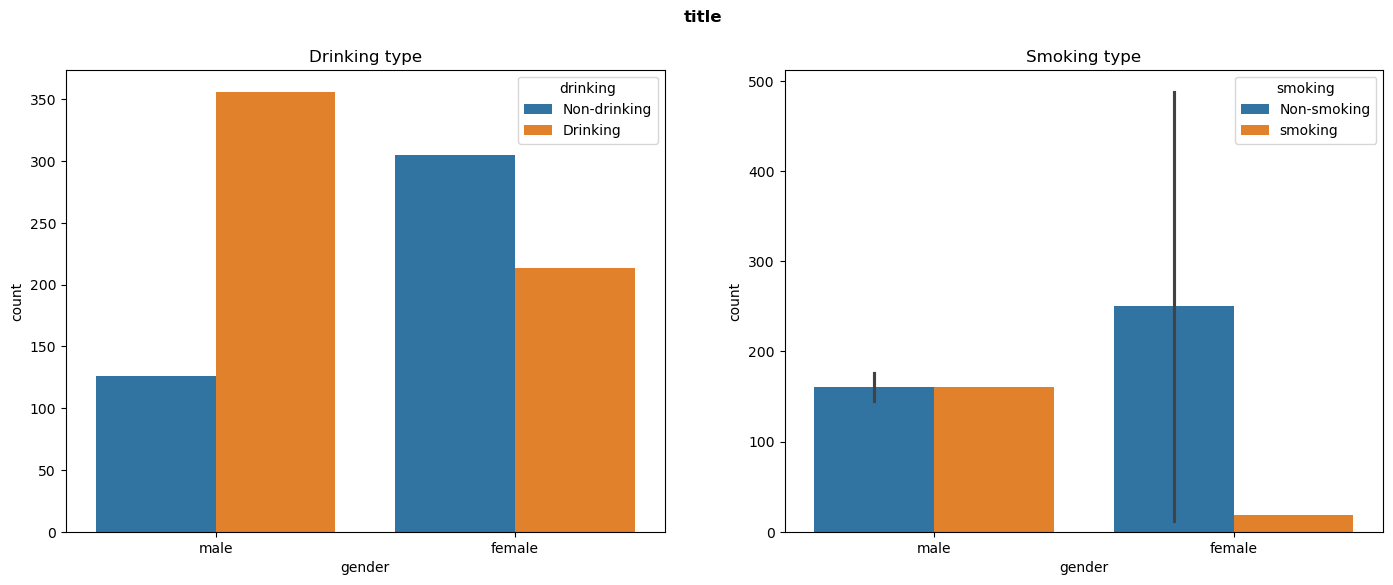

In [25]:
#영역나눠서 넣어주기
fig=plt.figure(figsize=(17,6))

area1=fig.add_subplot(1,2,1)
area2=fig.add_subplot(1,2,2)

ax1=sns.barplot(data=drinking,x='gender',y='count',hue='drinking',ax=area1)
ax2=sns.barplot(data=smoking,x='gender',y='count',hue='smoking',ax=area2)


fig.suptitle('title',fontweight='bold')
ax1.set_title('Drinking type')
ax2.set_title('Smoking type')

plt.show()


In [26]:
data2=data.loc[:,['gender','weight','waist']]

In [27]:
data2.corr()

,gender,weight,waist
gender,1.000000,-0.582641,-0.431970
weight,-0.582641,1.000000,0.787645
waist,-0.431970,0.787645,1.000000


<Axes: >

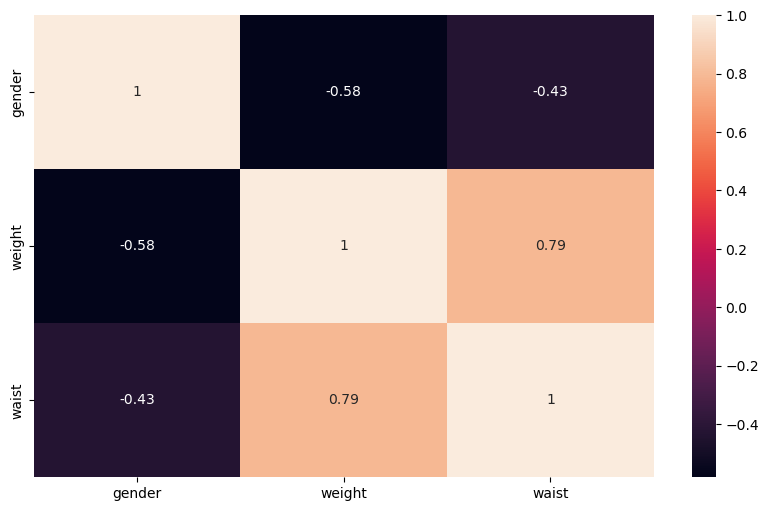

In [31]:
plt.figure(figsize=(10,6))
corr_data1=data2.corr()
sns.heatmap(data=corr_data1,annot=True)#annot은 안에 숫자값표시와연관이있음#cmap은 색